# Pre Processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset
df_train = pd.read_csv("TRAIN_PREPROCESED_DT.csv")
df_test = pd.read_csv("TEST_PREPROCESED_DT.csv")

In [2]:
df_train.describe()

vocal_channel  emotional_intensity    statement   repetition  \
count    1828.000000          1828.000000  1828.000000  1828.000000   
mean        0.409190             0.461707     0.500000     0.500000   
std         0.491819             0.498668     0.500137     0.500137   
min         0.000000             0.000000     0.000000     0.000000   
25%         0.000000             0.000000     0.000000     0.000000   
50%         0.000000             0.000000     0.500000     0.500000   
75%         1.000000             1.000000     1.000000     1.000000   
max         1.000000             1.000000     1.000000     1.000000   

               sex  frame_count          sum         mean          std  \
count  1828.000000  1828.000000  1828.000000  1828.000000  1828.000000   
mean      0.487965     0.328393     0.385530     0.435560     0.127720   
std       0.499992     0.174338     0.023741     0.022754     0.135295   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.186272     0.384599     0.434715     0.038657   
50%       0.000000     0.294118     0.385407     0.435454     0.085293   
75%       1.000000     0.450977     0.386010     0.436014     0.165725   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               min  ...  stft_kur_w4  stft_skew_w4    emotion_0    emotion_1  \
count  1828.000000  ...  1828.000000   1828.000000  1828.000000  1828.000000   
mean      0.841411  ...     0.124110      0.321340     0.153173     0.153173   
std       0.176170  ...     0.088526      0.090013     0.360253     0.360253   
min       0.000000  ...     0.000000      0.000000     0.000000     0.000000   
25%       0.802316  ...     0.072547      0.270174     0.000000     0.000000   
50%       0.904882  ...     0.102489      0.318116     0.000000     0.000000   
75%       0.954116  ...     0.151389      0.369760     0.000000     0.000000   
max       1.000000  ...     1.000000      1.000000     1.000000     1.000000   

         emotion_2    emotion_3    emotion_4    emotion_5    emotion_6  \
count  1828.000000  1828.000000  1828.000000  1828.000000  1828.000000   
mean      0.078775     0.153173     0.153173     0.076586     0.153173   
std       0.269460     0.360253     0.360253     0.266007     0.360253   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         emotion_7  
count  1828.000000  
mean      0.078775  
std       0.269460  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000  

[8 rows x 387 columns]

In [18]:
def multi_class_ROC_emotion(y_true_bin, y_pred_probs):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(8):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves
    plt.figure(figsize=(8, 6))
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange']
    for i, color in zip(range(8), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC Curve %s (area = %0.2f)' % (ENCODED_EMOTIONS[i], roc_auc[i]))

    # Set plot properties
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves - Multinomial Logistic Classifier')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

In [23]:
import numpy as np
from sklearn.metrics import classification_report

def calculate_metrics_from_report(classification_report_str):
    # Parse the classification report
    report_lines = classification_report_str.strip().split('\n')
    emotion_lines = report_lines[2:-3]  # Extract lines for each emotion
    macro_avg_line = report_lines[-2]  # Line for macro average

    # Extract relevant values for each emotion
    emotion_metrics = [line.split()[:4] for line in emotion_lines]
    emotion_recall = np.array([[float(metric) for metric in metrics] for metrics in emotion_metrics], dtype=object)

    # Extract the mean AUC from the macro average line
    mean_auc = float(macro_avg_line.split()[-1])

    # Calculate the balanced accuracy (mean recall)
    balanced_accuracy = np.mean(emotion_recall[:, 1], axis=0)

    return balanced_accuracy, mean_auc

In [4]:
len(df_train)

1828

In [5]:
emotion_cols = ["emotion_0", "emotion_1","emotion_2", "emotion_3", "emotion_4", "emotion_5", "emotion_6", "emotion_7"]

attributes = [col for col in df_train.columns if col not in emotion_cols]

In [6]:
df_train

vocal_channel  emotional_intensity  statement  repetition  sex  \
0                 0                    0          1           0    0   
1                 0                    0          1           1    0   
2                 0                    0          0           0    0   
3                 0                    0          0           1    0   
4                 0                    0          1           0    0   
...             ...                  ...        ...         ...  ...   
1823              0                    0          0           1    1   
1824              0                    1          1           0    1   
1825              0                    1          1           1    1   
1826              0                    1          0           0    1   
1827              0                    1          0           1    1   

      frame_count       sum      mean       std       min  ...  stft_kur_w4  \
0        0.107840  0.385871  0.435971  0.022102  0.967474  ...     0.956060   
1        0.117646  0.385792  0.435878  0.023967  0.963262  ...     0.107604   
2        0.098033  0.385883  0.435989  0.029249  0.968888  ...     0.379996   
3        0.068626  0.385857  0.435972  0.027946  0.969257  ...     0.119724   
4        0.176466  0.385852  0.435923  0.015209  0.979741  ...     0.201877   
...           ...       ...       ...       ...       ...  ...          ...   
1823     0.166666  0.385107  0.435124  0.031328  0.972209  ...     0.217423   
1824     0.205885  0.385144  0.435179  0.053698  0.933749  ...     0.089668   
1825     0.176472  0.384963  0.434975  0.061256  0.949551  ...     0.112596   
1826     0.274511  0.385282  0.435335  0.076355  0.935194  ...     0.130564   
1827     0.205879  0.385003  0.435032  0.059449  0.942818  ...     0.077677   

      stft_skew_w4  emotion_0  emotion_1  emotion_2  emotion_3  emotion_4  \
0         0.048224        0.0        0.0        0.0        0.0        0.0   
1         0.360443        0.0        0.0        0.0        0.0        0.0   
2         0.189619        0.0        0.0        0.0        0.0        0.0   
3         0.316584        0.0        0.0        0.0        0.0        0.0   
4         0.273444        0.0        1.0        0.0        0.0        0.0   
...            ...        ...        ...        ...        ...        ...   
1823      0.184008        0.0        0.0        0.0        0.0        0.0   
1824      0.275975        0.0        0.0        0.0        0.0        0.0   
1825      0.280463        0.0        0.0        0.0        0.0        0.0   
1826      0.226081        0.0        0.0        0.0        0.0        0.0   
1827      0.344877        0.0        0.0        0.0        0.0        0.0   

      emotion_5  emotion_6  emotion_7  
0           1.0        0.0        0.0  
1           1.0        0.0        0.0  
2           1.0        0.0        0.0  
3           1.0        0.0        0.0  
4           0.0        0.0        0.0  
...         ...        ...        ...  
1823        0.0        0.0        1.0  
1824        0.0        0.0        1.0  
1825        0.0        0.0        1.0  
1826        0.0        0.0        1.0  
1827        0.0        0.0        1.0  

[1828 rows x 387 columns]

In [7]:
X_train = df_train[attributes]
y_train = df_train[emotion_cols]
X_test = df_test[attributes]
y_test = df_test[emotion_cols]

In [8]:
y_train.shape

(1828, 8)

In [9]:
# Convert y_train X_test             one-hot encoding to class labels
y_train = np.argmax(y_train.values, axis=1)

# Print the shape of y_train
print(y_train.shape)

(1828,)


In [10]:
# Convert y_train X_test             one-hot encoding to class labels
y_test = np.argmax(y_test.values, axis=1)

# Print the shape of y_train
print(y_test.shape)

(624,)


In [11]:
X_test.shape

(624, 379)

# Support Vector Machines

# Non Linear SVM

## Initial test with default values

In [2]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Create a linear SVM classifier
svm = LinearSVC(random_state=42)

# Train the classifier on the training data
svm.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = svm.predict(X_test)

# Evaluate the model performance on the validation data
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred, average=None)
classification_rep = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('F1-scores:', f1_scores)
print('Classification Report:')
print(classification_rep)

NameError: name 'X_train' is not defined

In [12]:
# Convert the training data to a NumPy array
X_train_v = X_train.values
X_test_v = X_test.values
X_train

vocal_channel  emotional_intensity  statement  repetition  sex  \
0                 0                    0          1           0    0   
1                 0                    0          1           1    0   
2                 0                    0          0           0    0   
3                 0                    0          0           1    0   
4                 0                    0          1           0    0   
...             ...                  ...        ...         ...  ...   
1823              0                    0          0           1    1   
1824              0                    1          1           0    1   
1825              0                    1          1           1    1   
1826              0                    1          0           0    1   
1827              0                    1          0           1    1   

      frame_count       sum      mean       std       min  ...  stft_std_w4  \
0        0.107840  0.385871  0.435971  0.022102  0.967474  ...     0.210162   
1        0.117646  0.385792  0.435878  0.023967  0.963262  ...     0.236515   
2        0.098033  0.385883  0.435989  0.029249  0.968888  ...     0.330131   
3        0.068626  0.385857  0.435972  0.027946  0.969257  ...     0.302564   
4        0.176466  0.385852  0.435923  0.015209  0.979741  ...     0.283871   
...           ...       ...       ...       ...       ...  ...          ...   
1823     0.166666  0.385107  0.435124  0.031328  0.972209  ...     0.684689   
1824     0.205885  0.385144  0.435179  0.053698  0.933749  ...     0.782550   
1825     0.176472  0.384963  0.434975  0.061256  0.949551  ...     0.663268   
1826     0.274511  0.385282  0.435335  0.076355  0.935194  ...     0.781603   
1827     0.205879  0.385003  0.435032  0.059449  0.942818  ...     0.593462   

      stft_min_w4  stft_q01_w4  stft_q05_w4  stft_q25_w4  stft_q50_w4  \
0        0.000000     0.000000     0.779808     0.850543     0.859081   
1        0.463896     0.570998     0.650782     0.746581     0.800781   
2        0.000000     0.000000     0.575319     0.771084     0.832326   
3        0.353100     0.474429     0.550158     0.727086     0.811858   
4        0.305413     0.385338     0.589475     0.760517     0.816912   
...           ...          ...          ...          ...          ...   
1823     0.000000     0.000000     0.000000     0.650079     0.782770   
1824     0.000000     0.000000     0.000000     0.449762     0.755711   
1825     0.000000     0.000000     0.134370     0.535258     0.738294   
1826     0.000000     0.000000     0.000000     0.580178     0.765890   
1827     0.000000     0.000000     0.225923     0.493649     0.693072   

      stft_q75_w4  stft_q95_w4  stft_kur_w4  stft_skew_w4  
0        0.907952          1.0     0.956060      0.048224  
1        0.885585          1.0     0.107604      0.360443  
2        0.910557          1.0     0.379996      0.189619  
3        0.897600          1.0     0.119724      0.316584  
4        0.888957          1.0     0.201877      0.273444  
...           ...          ...          ...           ...  
1823     0.904541          1.0     0.217423      0.184008  
1824     0.911510          1.0     0.089668      0.275975  
1825     0.902721          1.0     0.112596      0.280463  
1826     0.880323          1.0     0.130564      0.226081  
1827     0.867118          1.0     0.077677      0.344877  

[1828 rows x 379 columns]

In [142]:
# import numpy as np
# import matplotlib.pyplot as plt
# X_test              sklearn.decomposition import PCA
# X_test              sklearn.svm import LinearSVC

# # Create a linear SVM classifier
# import numpy as np
# import matplotlib.pyplot as plt
# X_test              sklearn.decomposition import PCA
# X_test              sklearn.svm import LinearSVC

# # Create a linear SVM classifier
# svm = LinearSVC(random_state=42)

# # Train the classifier on the training data
# svm.fit(X_train, y_train)

# # Create a new PCA object and fit it to the training data
# pca = PCA(n_components=2)
# pca.fit(X_train)

# # Reduce the dimensionality of the data using PCA
# X_pca = pca.transform(X_train)

# # Predict the labels of the test data
# y_pred = svm.predict(X_test             )

# decision_function = svm.decision_function(X_train)
# support_vector_indices = []
# for i in range(len(y_train)):
#     if np.all((2 * y_train[i] - 1) * decision_function[i] <= 1):
#         support_vector_indices.append(i)
# support_vectors = X_train.iloc[support_vector_indices]  # Use iloc to index based on position

# support_vectors_pca = pca.transform(support_vectors)

# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
# plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
#             linewidth=1, facecolors='none', edgecolors='k')
# plt.show()


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


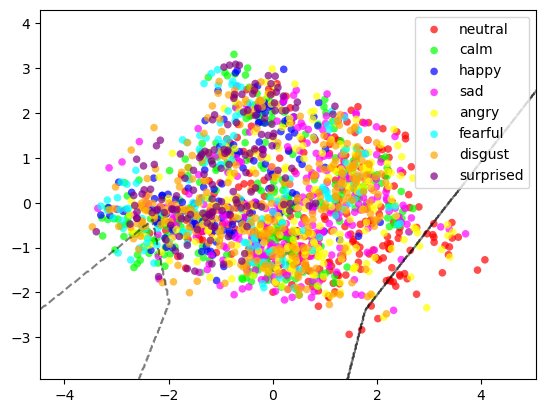

In [54]:
# Assuming you have X_train and y_train defined with the appropriate data

# Create a linear SVM classifier
svm = LinearSVC(random_state=42, C=1, max_iter=1000)

# Train the classifier on the training data
svm.fit(X_train, y_train)

# Create a new PCA object and fit it to the training data
pca = PCA(n_components=2)
pca.fit(X_train)

# Reduce the dimensionality of the data using PCA
X_pca = pca.transform(X_train)

# Predict the labels of the training data
y_pred = svm.predict(X_train)

# Define class names and colors
class_names = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']
colors = ['#FF0000', '#00FF00', '#0000FF', '#FF00FF', '#FFFF00', '#00FFFF', '#FFA500', '#800080']

# Plot the data points with different colors for each class
for i, class_name in enumerate(class_names):
    class_indices = np.where(y_train == i)[0]
    plt.scatter(X_pca[class_indices, 0], X_pca[class_indices, 1], c=colors[i], label=class_name,
                edgecolor='none', alpha=0.7, s=30)

# Plot the decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = svm.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Add legend
plt.legend()

plt.show()


In [ ]:
# Here in initial test, the default values for C=1, and Max_iter = 1000 was selected as such.

## Real testing using GridSearch

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


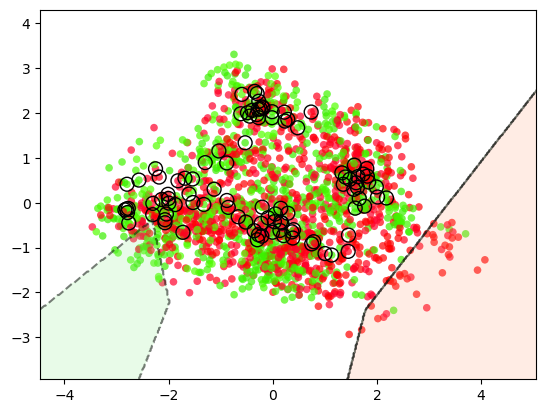

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC

# Create a linear SVM classifier
svm = LinearSVC(random_state=42, C=1, max_iter=1000)

# Train the classifier on the training data
svm.fit(X_train, y_train)

# Create a new PCA object and fit it to the training data
pca = PCA(n_components=2)
pca.fit(X_train)

# Reduce the dimensionality of the data using PCA
X_pca = pca.transform(X_train)

# Predict the labels of the test data
y_pred = svm.predict(X_test            )

decision_function = svm.decision_function(X_train)
support_vector_indices = []
for i in range(len(y_train)):
    if np.all((2 * y_train[i] - 1) * decision_function[i] <= 1):
        support_vector_indices.append(i)
support_vectors = X_train.iloc[support_vector_indices]  # Use iloc to index based on position

support_vectors_pca = pca.transform(support_vectors)

# Plot the data points and the support vectors
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
            linewidth=1, facecolors='none', edgecolors='k')

# Plot the decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = svm.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.contourf(xx, yy, Z, colors=['#FFA07A', '#90EE90'], levels=[-1, 0, 1], alpha=0.2)

plt.show()


In [21]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [1000, 5000, 10000],
}

# Create a LinearSVC object
svc = LinearSVC(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = grid_search.predict(X_test            )

# Evaluate the model performance on the validation data
y_pred = grid_search.predict(X_test            )
accuracy = accuracy_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred, average=None)
classification_rep = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('F1-scores:', f1_scores)
print('Classification Report:')
print(classification_rep)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

Accuracy: 0.5080128205128205
F1-scores: [0.68995633 0.58928571 0.56692913 0.42666667 0.47342995 0.37777778
 0.208      0.52083333]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.82      0.69        96
           1       0.52      0.69      0.59        96
           2       0.46      0.75      0.57        48
           3       0.59      0.33      0.43        96
           4       0.44      0.51      0.47        96
           5       0.40      0.35      0.38        48
           6       0.45      0.14      0.21        96
           7       0.52      0.52      0.52        48

    accuracy                           0.51       624
   macro avg       0.50      0.51      0.48       624
weighted avg       0.51      0.51      0.48       624



In [ ]:
# import numpy as np
# from sklearn.metrics import classification_report

# def calculate_metrics_from_report(classification_report_str):
#     # Parse the classification report
#     report_lines = classification_report_str.strip().split('\n')
#     emotion_lines = report_lines[2:-3]  # Extract lines for each emotion
#     macro_avg_line = report_lines[-2]  # Line for macro average

#     # Extract relevant values for each emotion
#     emotion_metrics = [line.split()[:4] for line in emotion_lines]
#     emotion_recall = np.array([[float(metric) for metric in metrics] for metrics in emotion_metrics], dtype=object)

#     # Extract the mean AUC from the macro average line
#     mean_auc = float(macro_avg_line.split()[-1])

#     # Calculate the balanced accuracy (mean recall)
#     balanced_accuracy = np.mean(emotion_recall[:, 1], axis=0)

#     return balanced_accuracy, mean_auc

In [42]:
# Get the best parameters
best_params = grid_search.best_params_

# Print the best parameters
print('Best Parameters:', best_params)
# Here in real test, we got the best hyperparameter values for C=1, and Max_iter = 5000 .But, the performance is exactly the same

Best Parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': 1000}


In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import numpy as np

# Create a linear SVM classifier with probability estimates
svm = SVC(kernel='linear', probability=True, random_state=42)

# Train the classifier on the training data
svm.fit(X_train, y_train)

# Predict the probabilities of the test data
y_pred_probs = svm.predict_proba(X_test)

# Binarize the true labels
y_true_bin = label_binarize(y_test, classes=np.unique(y_test))

# Define the names of the emotions corresponding to the class labels
ENCODED_EMOTIONS = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']

# Call the multi_class_ROC_emotion function
multi_class_ROC_emotion(y_true_bin, y_pred_probs)

# Call the multi_class_ROC_emotion function
multi_class_ROC_emotion(y_true_bin, y_pred_probs)

# Evaluate the model performance on the validation data
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred, average=None)
classification_rep = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('F1-scores:', f1_scores)
print('Classification Report:')
print(classification_rep)


NameError: name 'multi_class_ROC_emotion' is not defined

## SVM Non-Linear Deault values


In [36]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Create a non-linear SVM classifier
svm = SVC(random_state=42, gamma="auto")

# Train the classifier on the training data
svm.fit(X_train, y_train)

# Predict the labels of the validation data
y_pred = svm.predict(X_test)

# Evaluate the model performance on the validation data
accuracy = accuracy_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred, average=None)
classification_rep = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('F1-scores:', f1_scores)
print('Classification Report:')
print(classification_rep)


Accuracy: 0.38782051282051283
F1-scores: [0.67088608 0.528      0.         0.33333333 0.43243243 0.
 0.29054054 0.03921569]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.55      0.67        96
           1       0.43      0.69      0.53        96
           2       0.00      0.00      0.00        48
           3       0.55      0.24      0.33        96
           4       0.34      0.58      0.43        96
           5       0.00      0.00      0.00        48
           6       0.21      0.45      0.29        96
           7       0.33      0.02      0.04        48

    accuracy                           0.39       624
   macro avg       0.34      0.32      0.29       624
weighted avg       0.39      0.39      0.35       624



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Real Testing

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'max_iter': [1000, 5000, 10000]
}

# Create an SVC object
svc = SVC(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Predict the labels of the test data
y_pred = grid_search.predict(X_test)

# Evaluate the model performance on the validation data
accuracy = accuracy_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred, average=None)
classification_rep = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('F1-scores:', f1_scores)
print('Classification Report:')
print(classification_rep)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1

Accuracy: 0.5064102564102564
F1-scores: [0.65811966 0.60550459 0.59649123 0.42236025 0.38095238 0.43010753
 0.4        0.42696629]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.80      0.66        96
           1       0.54      0.69      0.61        96
           2       0.52      0.71      0.60        48
           3       0.52      0.35      0.42        96
           4       0.39      0.38      0.38        96
           5       0.44      0.42      0.43        48
           6       0.56      0.31      0.40        96
           7       0.46      0.40      0.43        48

    accuracy                           0.51       624
   macro avg       0.50      0.51      0.49       624
weighted avg       0.50      0.51      0.49       624



In [15]:
calculate_metrics_from_report(classification_rep)

/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_81247/4017790394.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  emotion_recall = np.array([[float(metric) for metric in metrics] for metrics in emotion_metrics])


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [44]:
# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': 1000}


### Plotting PCA

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1

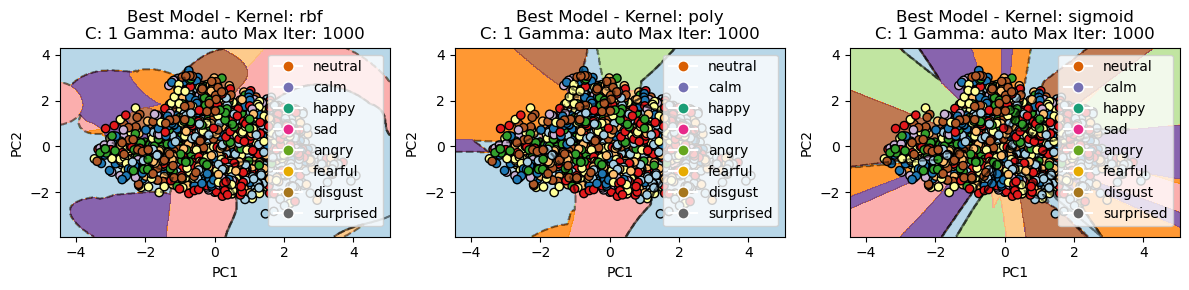

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'max_iter': [1000, 5000, 10000]
}

# Create an SVC object
svc = SVC(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_pca, y_train)

# Get the best parameters and best model for each kernel
best_params = grid_search.best_params_
best_models = []

for kernel in param_grid['kernel']:
    # Set the best parameters for the current kernel
    kernel_params = {key: value for key, value in best_params.items() if key != 'kernel'}
    kernel_params['kernel'] = kernel
    
    # Create a new SVC object with the best parameters for the current kernel
    best_model = SVC(**kernel_params)
    best_model.fit(X_train_pca, y_train)
    best_models.append(best_model)

# Generate meshgrid for the plot
resolution = 0.02
x1_min, x1_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
x2_min, x2_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                       np.arange(x2_min, x2_max, resolution))

# Plot the decision boundaries and margins for each best model in 2D
fig, axes = plt.subplots(nrows=1, ncols=len(param_grid['kernel']), figsize=(12, 3))
class_names = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']
colors = ['#d95f02', '#7570b3', '#1b9e77', '#e7298a', '#66a61e', '#e6ab02', '#a6761d', '#666666']

for i, kernel in enumerate(param_grid['kernel']):
    # Set the best parameters for the current kernel
    kernel_params = {key: value for key, value in best_params.items() if key != 'kernel'}
    kernel_params['kernel'] = kernel
    
    # Create a new SVC object with the best parameters for the current kernel
    best_model = SVC(**kernel_params)
    best_model.fit(X_train_pca, y_train)
    
    # Plot the decision boundary and margins
    Z = best_model.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)
    axes[i].contourf(xx1, xx2, Z, cmap=plt.cm.Paired, alpha=0.8)
    axes[i].contour(xx1, xx2, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                    linestyles=['--', '-', '--'])
    axes[i].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolor='k')
    axes[i].set_xlabel('PC1')
    axes[i].set_ylabel('PC2')
    axes[i].set_title(f"Best Model - Kernel: {kernel}\nC: {best_params['C']} "
                      f"Gamma: {best_params['gamma']} Max Iter: {best_params['max_iter']}")
    axes[i].set_xlim(xx1.min(), xx1.max())
    axes[i].set_ylim(xx2.min(), xx2.max())
    axes[i].legend(handles=[plt.Line2D([], [], marker='o', color='w',label=class_names[j], 
                                        markerfacecolor=colors[j], markersize=8) for j in np.unique(y_train)])

plt.tight_layout()
plt.show()

### plotting Umap

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1

Best model for rbf kernel: SVC(C=1, gamma='auto', max_iter=1000)



/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best model for poly kernel: SVC(C=1, gamma='auto', kernel='poly', max_iter=1000)

Best model for sigmoid kernel: SVC(C=1, gamma='auto', kernel='sigmoid', max_iter=1000)

Best model overall: SVC(C=1, gamma='auto', max_iter=1000, random_state=42)



/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


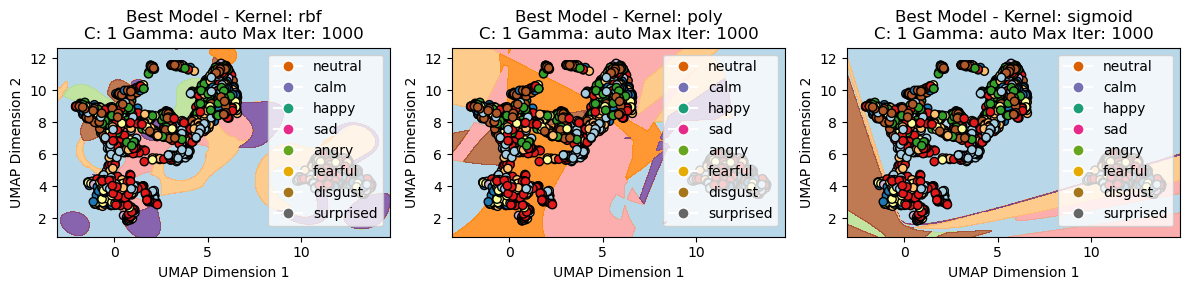

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from umap.umap_ import UMAP

# Apply UMAP to reduce dimensionality
umap = UMAP(n_components=2, random_state=42)
X_train_umap = umap.fit_transform(X_train)

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'max_iter': [1000, 5000, 10000]
}

# Create an SVC object
svc = SVC(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_umap, y_train)

# Get the best parameters and best model for each kernel
best_params = grid_search.best_params_
best_models = []

for kernel in param_grid['kernel']:
    # Set the best parameters for the current kernel
    kernel_params = {key: value for key, value in best_params.items() if key != 'kernel'}
    kernel_params['kernel'] = kernel
    
    # Create a new SVC object with the best parameters for the current kernel
    best_model = SVC(**kernel_params)
    best_model.fit(X_train_umap, y_train)
    best_models.append(best_model)

    print(f"Best model for {kernel} kernel: {best_model}\n")

# Get the best model overall
best_model_overall = grid_search.best_estimator_
print(f"Best model overall: {best_model_overall}\n")

# Generate meshgrid for the plot
resolution = 0.02
x1_min, x1_max = X_train_umap[:, 0].min() - 1, X_train_umap[:, 0].max() + 1
x2_min, x2_max = X_train_umap[:, 1].min() - 1, X_train_umap[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                       np.arange(x2_min, x2_max, resolution))

# Plot the decision boundaries for each best model in 2D
fig, axes = plt.subplots(nrows=1, ncols=len(param_grid['kernel']), figsize=(12, 3))
class_names = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']
colors = ['#d95f02', '#7570b3', '#1b9e77', '#e7298a', '#66a61e', '#e6ab02', '#a6761d', '#666666']

for i, kernel in enumerate(param_grid['kernel']):
    # Set the best parameters for the current kernel
    kernel_params = {key: value for key, value in best_params.items() if key != 'kernel'}
    kernel_params['kernel'] = kernel
    
    # Create a new SVC object with the best parameters for the current kernel
    best_model = SVC(**kernel_params)
    best_model.fit(X_train_umap, y_train)
    
    mesh_predictions = best_model.predict(np.c_[xx1.ravel(), xx2.ravel()])
    mesh_predictions = mesh_predictions.reshape(xx1.shape)
    axes[i].contourf(xx1, xx2, mesh_predictions, cmap=plt.cm.Paired, alpha=0.8)
    axes[i].scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolor='k')
    axes[i].set_xlabel('UMAP Dimension 1')
    axes[i].set_ylabel('UMAP Dimension 2')
    axes[i].set_title(f"Best Model - Kernel: {kernel}\nC: {best_params['C']} "
                      f"Gamma: {best_params['gamma']} Max Iter: {best_params['max_iter']}")
    axes[i].set_xlim(xx1.min(), xx1.max())
    axes[i].set_ylim(xx2.min(), xx2.max())
    axes[i].legend(handles=[plt.Line2D([], [], marker='o', color='w', label=class_names[j], 
                                        markerfacecolor=colors[j], markersize=8) for j in np.unique(y_train)])

plt.tight_layout()
plt.show()


In [33]:
import numpy as np

def calculate_metrics_from_report(classification_report_str):
    report_lines = classification_report_str.strip().split('\n')
    metric_lines = report_lines[2:-3]

    # Extract relevant values for each class
    metrics = [line.split() for line in metric_lines]
    recall_values = [float(metric[2]) for metric in metrics]

    # Calculate the mean AUC and balanced accuracy
    mean_auc = float(report_lines[-2].split()[-1])
    balanced_accuracy = np.mean(recall_values)

    return balanced_accuracy, mean_auc


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


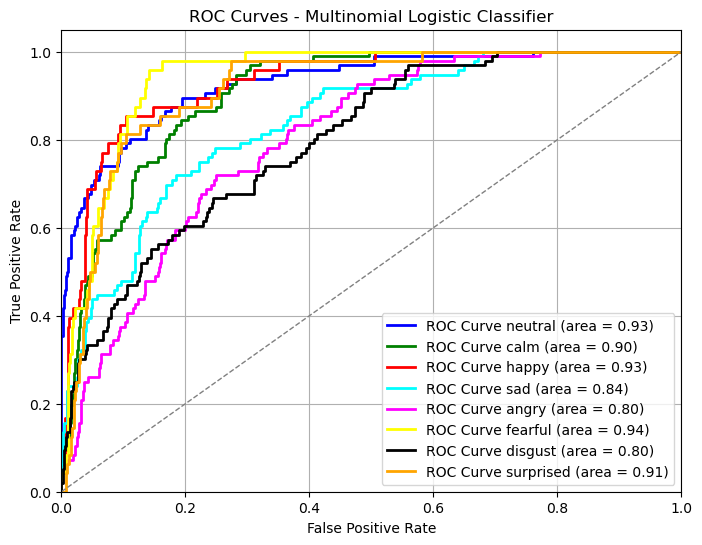

Accuracy: 0.5064102564102564
F1-scores: [0.65811966 0.60550459 0.59649123 0.42236025 0.38095238 0.43010753
 0.4        0.42696629]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.80      0.66        96
           1       0.54      0.69      0.61        96
           2       0.52      0.71      0.60        48
           3       0.52      0.35      0.42        96
           4       0.39      0.38      0.38        96
           5       0.44      0.42      0.43        48
           6       0.56      0.31      0.40        96
           7       0.46      0.40      0.43        48

    accuracy                           0.51       624
   macro avg       0.50      0.51      0.49       624
weighted avg       0.50      0.51      0.49       624



In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Create a non-linear SVM classifier
svm = SVC(random_state=42, gamma="auto", C=100, kernel='rbf', max_iter=1000, probability=True)

# Train the classifier on the training data
svm.fit(X_train, y_train)

# Predict the probabilities of the test data
y_pred_probs = svm.predict_proba(X_test)

# Binarize the true labels
y_true_bin = label_binarize(y_test, classes=np.unique(y_test))

# Define the names of the emotions corresponding to the class labels
ENCODED_EMOTIONS = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']


# Call the multi_class_ROC_emotion function
multi_class_ROC_emotion(y_true_bin, y_pred_probs)

# Evaluate the model performance on the validation data
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred, average=None)
classification_rep1 = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('F1-scores:', f1_scores)
print('Classification Report:')
print(classification_rep1)


In [48]:
import numpy as np

def calculate_balanced_accuracy(y_true, y_pred):
    # Calculate the recall for each class
    unique_classes = np.unique(y_true)
    class_recalls = []
    for class_ in unique_classes:
        true_positive = np.sum((y_true == class_) & (y_pred == class_))
        false_negative = np.sum((y_true == class_) & (y_pred != class_))
        recall = true_positive / (true_positive + false_negative)
        class_recalls.append(recall)

    # Calculate the balanced accuracy
    balanced_accuracy = np.mean(class_recalls)

    return balanced_accuracy

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


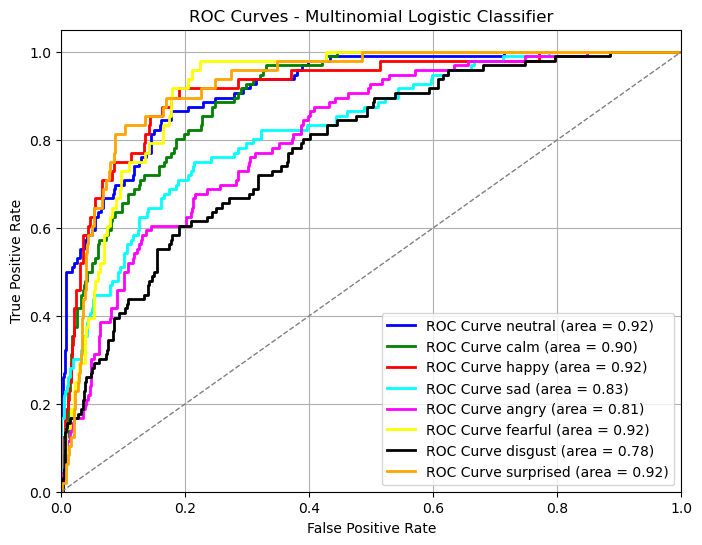

Accuracy: 0.4823717948717949
F1-scores: [0.61666667 0.57798165 0.5        0.43037975 0.46153846 0.34408602
 0.31081081 0.42857143]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.77      0.62        96
           1       0.52      0.66      0.58        96
           2       0.44      0.58      0.50        48
           3       0.55      0.35      0.43        96
           4       0.45      0.47      0.46        96
           5       0.36      0.33      0.34        48
           6       0.44      0.24      0.31        96
           7       0.50      0.38      0.43        48

    accuracy                           0.48       624
   macro avg       0.47      0.47      0.46       624
weighted avg       0.48      0.48      0.47       624



In [34]:
# LINEAR
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Create a non-linear SVM classifier
svm = SVC(random_state=42, C=100, max_iter=1000, probability=True)

# Train the classifier on the training data
svm.fit(X_train, y_train)

# Predict the probabilities of the test data
y_pred_probs = svm.predict_proba(X_test)

# Binarize the true labels
y_true_bin = label_binarize(y_test, classes=np.unique(y_test))

# Define the names of the emotions corresponding to the class labels
ENCODED_EMOTIONS = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']


# Call the multi_class_ROC_emotion function
multi_class_ROC_emotion(y_true_bin, y_pred_probs)

# Evaluate the model performance on the validation data
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred, average=None)
classification_rep1 = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('F1-scores:', f1_scores)
print('Classification Report:')
print(classification_rep1)


In [43]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr')
print("AUC:", auc)

AUC: 0.8745787135679713


In [49]:

balanced_accuracy = calculate_balanced_accuracy(y_test, y_pred)

print("Balanced Accuracy:", balanced_accuracy)

Balanced Accuracy: 0.47265625


# Non - Linear

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


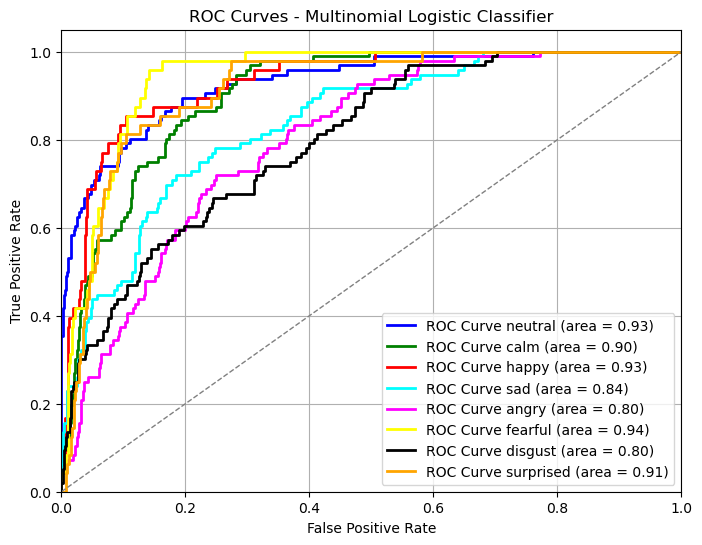

Accuracy: 0.5064102564102564
F1-scores: [0.65811966 0.60550459 0.59649123 0.42236025 0.38095238 0.43010753
 0.4        0.42696629]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.80      0.66        96
           1       0.54      0.69      0.61        96
           2       0.52      0.71      0.60        48
           3       0.52      0.35      0.42        96
           4       0.39      0.38      0.38        96
           5       0.44      0.42      0.43        48
           6       0.56      0.31      0.40        96
           7       0.46      0.40      0.43        48

    accuracy                           0.51       624
   macro avg       0.50      0.51      0.49       624
weighted avg       0.50      0.51      0.49       624



In [50]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Create a non-linear SVM classifier
svm = SVC(random_state=42, C=100, gamma = "auto", kernel = "rbf", max_iter=1000, probability=True)

# Train the classifier on the training data
svm.fit(X_train, y_train)

# Predict the probabilities of the test data
y_pred_probs = svm.predict_proba(X_test)

# Binarize the true labels
y_true_bin = label_binarize(y_test, classes=np.unique(y_test))

# Define the names of the emotions corresponding to the class labels
ENCODED_EMOTIONS = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']


# Call the multi_class_ROC_emotion function
multi_class_ROC_emotion(y_true_bin, y_pred_probs)

# Evaluate the model performance on the validation data
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1_scores = f1_score(y_test, y_pred, average=None)
classification_rep1 = classification_report(y_test, y_pred)

print('Accuracy:', accuracy)
print('F1-scores:', f1_scores)
print('Classification Report:')
print(classification_rep1)


In [51]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_pred_probs, multi_class='ovr')
print("AUC:", auc)

AUC: 0.8827775640519782


In [52]:

balanced_accuracy = calculate_balanced_accuracy(y_test, y_pred)

print("Balanced Accuracy:", balanced_accuracy)

Balanced Accuracy: 0.5065104166666667


### Additional Testing

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1

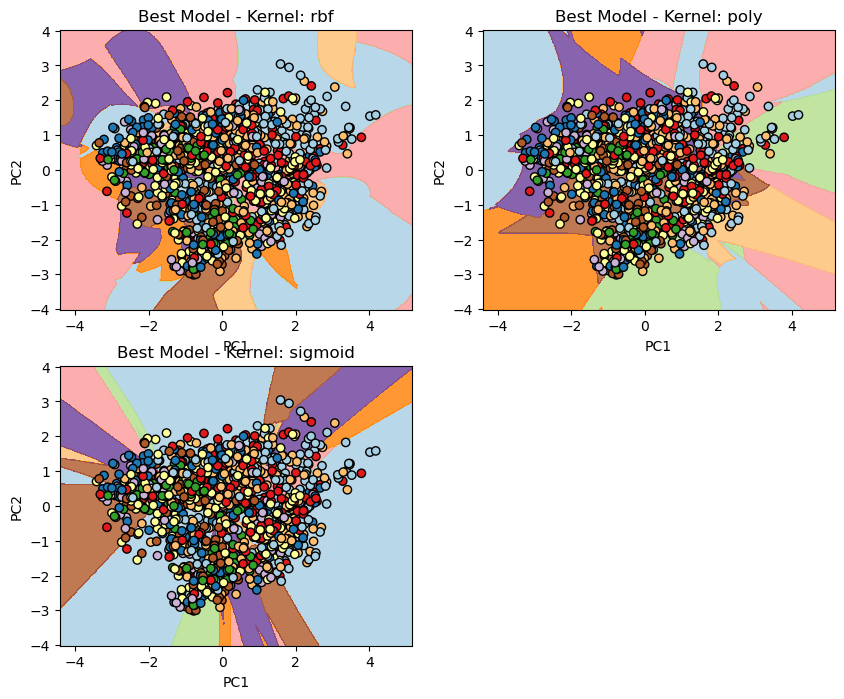

In [169]:
# not impt
# no
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)  # Set the number of components to 2 for visualization
X_train_pca = pca.fit_transform(X_train)

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'max_iter': [1000, 5000, 10000]
}

# Create an SVC object
svc = SVC(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_pca, y_train)

# Get the best parameters and best model for each kernel type
best_params = grid_search.best_params_
best_models = []

# Iterate over each kernel type
for kernel in ['rbf', 'poly', 'sigmoid']:
    # Get the best parameters for the current kernel
    kernel_params = {key: value for key, value in best_params.items() if key != 'kernel'}
    kernel_params['kernel'] = kernel
    
    # Create a new SVC object with the best parameters for the current kernel
    best_model = SVC(**kernel_params)
    best_model.fit(X_train_pca, y_train)
    best_models.append(best_model)

# Generate meshgrid for the plot
resolution = 0.02  # Set the resolution for the meshgrid
x1_min, x1_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
x2_min, x2_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                       np.arange(x2_min, x2_max, resolution))

# Make predictions on the meshgrid points for each best model
mesh_predictions = []
for model in best_models:
    mesh_predictions.append(model.predict(np.c_[xx1.ravel(), xx2.ravel()]))
mesh_predictions = np.array(mesh_predictions)

# Plot the decision boundaries
plt.figure(figsize=(10, 8))
for i, mesh_pred in enumerate(mesh_predictions):
    plt.subplot(2, 2, i + 1)
    mesh_pred = mesh_pred.reshape(xx1.shape)
    plt.contourf(xx1, xx2, mesh_pred, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolor='k')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title(f"Best Model - Kernel: {['rbf', 'poly', 'sigmoid'][i]}")
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1

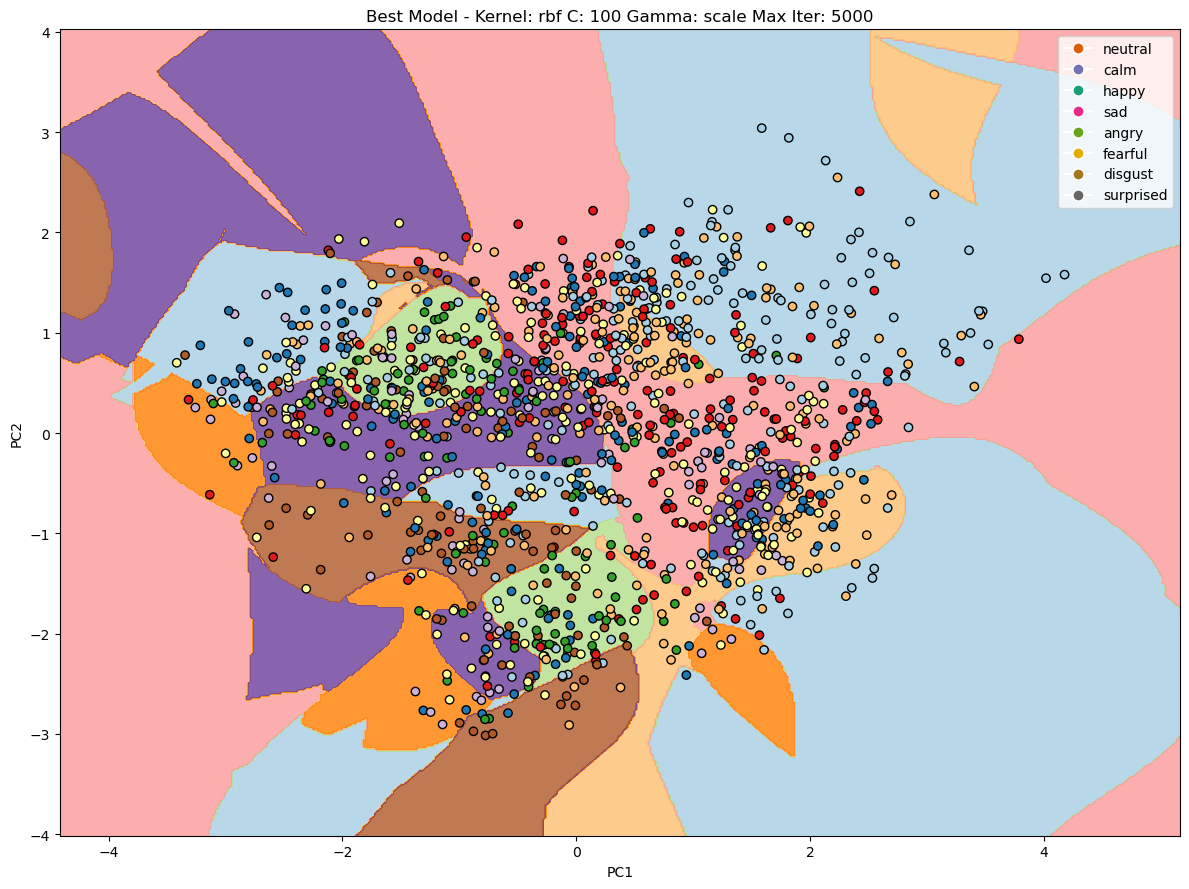

In [176]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'max_iter': [1000, 5000, 10000]
}

# Create an SVC object
svc = SVC(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_pca, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Generate meshgrid for the plot
resolution = 0.02
x1_min, x1_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
x2_min, x2_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                       np.arange(x2_min, x2_max, resolution))

# Make predictions on the meshgrid points
mesh_predictions = best_model.predict(np.c_[xx1.ravel(), xx2.ravel()])
mesh_predictions = mesh_predictions.reshape(xx1.shape)

# Plot the decision boundaries
plt.figure(figsize=(12, 9))
colors = ['#d95f02', '#7570b3', '#1b9e77', '#e7298a', '#66a61e', '#e6ab02', '#a6761d', '#666666']
class_names = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']

plt.contourf(xx1, xx2, mesh_predictions, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f"Best Model - Kernel: {best_params['kernel']} C: {best_params['C']} "
          f"Gamma: {best_params['gamma']} Max Iter: {best_params['max_iter']}")
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())
plt.legend(handles=[plt.Line2D([], [], marker='o', color='w', label=class_names[j], 
            markerfacecolor=colors[j], markersize=8) for j in np.unique(y_train)])
plt.tight_layout()

plt.show()


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1

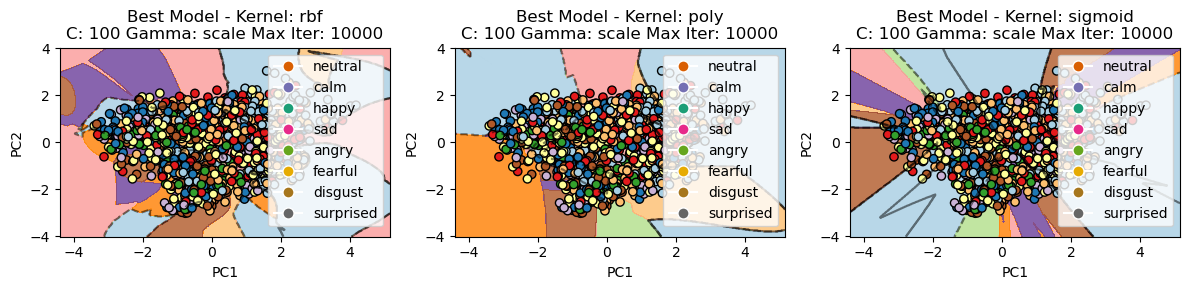

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'max_iter': [1000, 5000, 10000]
}

# Create an SVC object
svc = SVC(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_pca, y_train)

# Get the best parameters and best model for each kernel
best_params = grid_search.best_params_
best_models = []

for kernel in param_grid['kernel']:
    # Set the best parameters for the current kernel
    kernel_params = {key: value for key, value in best_params.items() if key != 'kernel'}
    kernel_params['kernel'] = kernel
    
    # Create a new SVC object with the best parameters for the current kernel
    best_model = SVC(**kernel_params)
    best_model.fit(X_train_pca, y_train)
    best_models.append(best_model)

# Generate meshgrid for the plot
resolution = 0.02
x1_min, x1_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
x2_min, x2_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                       np.arange(x2_min, x2_max, resolution))

# Plot the decision boundaries and margins for each best model in 2D
fig, axes = plt.subplots(nrows=1, ncols=len(param_grid['kernel']), figsize=(12, 3))
class_names = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']
colors = ['#d95f02', '#7570b3', '#1b9e77', '#e7298a', '#66a61e', '#e6ab02', '#a6761d', '#666666']

for i, kernel in enumerate(param_grid['kernel']):
    # Set the best parameters for the current kernel
    kernel_params = {key: value for key, value in best_params.items() if key != 'kernel'}
    kernel_params['kernel'] = kernel
    
    # Create a new SVC object with the best parameters for the current kernel
    best_model = SVC(**kernel_params)
    best_model.fit(X_train_pca, y_train)
    
    # Plot the decision boundary and margins
    Z = best_model.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)
    axes[i].contourf(xx1, xx2, Z, cmap=plt.cm.Paired, alpha=0.8)
    axes[i].contour(xx1, xx2, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                    linestyles=['--', '-', '--'])
    axes[i].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolor='k')
    axes[i].set_xlabel('PC1')
    axes[i].set_ylabel('PC2')
    axes[i].set_title(f"Best Model - Kernel: {kernel}\nC: {best_params['C']} "
                      f"Gamma: {best_params['gamma']} Max Iter: {best_params['max_iter']}")
    axes[i].set_xlim(xx1.min(), xx1.max())
    axes[i].set_ylim(xx2.min(), xx2.max())
    axes[i].legend(handles=[plt.Line2D([], [], marker='o', color='w',label=class_names[j], 
                                        markerfacecolor=colors[j], markersize=8) for j in np.unique(y_train)])

plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1

Best model for rbf kernel: SVC(C=100, max_iter=1000)

Best model for poly kernel: SVC(C=100, kernel='poly', max_iter=1000)

Best model for sigmoid kernel: SVC(C=100, kernel='sigmoid', max_iter=1000)

Best model overall: SVC(C=100, max_iter=1000, random_state=42)



/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


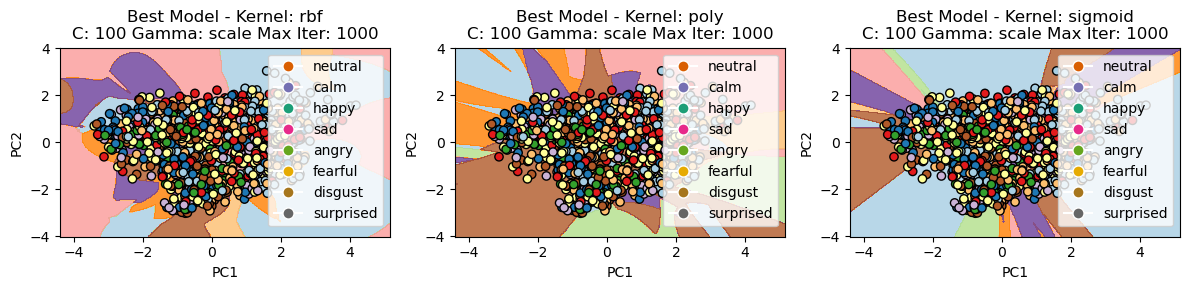

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'max_iter': [1000, 5000, 10000]
}

# Create an SVC object
svc = SVC(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_pca, y_train)

# Get the best parameters and best model for each kernel
best_params = grid_search.best_params_
best_models = []

for kernel in param_grid['kernel']:
    # Set the best parameters for the current kernel
    kernel_params = {key: value for key, value in best_params.items() if key != 'kernel'}
    kernel_params['kernel'] = kernel
    
    # Create a new SVC object with the best parameters for the current kernel
    best_model = SVC(**kernel_params)
    best_model.fit(X_train_pca, y_train)
    best_models.append(best_model)

    print(f"Best model for {kernel} kernel: {best_model}\n")

# Get the best model overall
best_model_overall = grid_search.best_estimator_
print(f"Best model overall: {best_model_overall}\n")

# Generate meshgrid for the plot
resolution = 0.02
x1_min, x1_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
x2_min, x2_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                       np.arange(x2_min, x2_max, resolution))

# Plot the decision boundaries for each best model in 2D
fig, axes = plt.subplots(nrows=1, ncols=len(param_grid['kernel']), figsize=(12, 3))
class_names = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']
colors = ['#d95f02', '#7570b3', '#1b9e77', '#e7298a', '#66a61e', '#e6ab02', '#a6761d', '#666666']

for i, kernel in enumerate(param_grid['kernel']):
    # Set the best parameters for the current kernel
    kernel_params = {key: value for key, value in best_params.items() if key != 'kernel'}
    kernel_params['kernel'] = kernel
    
    # Create a new SVC object with the best parameters for the current kernel
    best_model = SVC(**kernel_params)
    best_model.fit(X_train_pca, y_train)
    
    mesh_predictions = best_model.predict(np.c_[xx1.ravel(), xx2.ravel()])
    mesh_predictions = mesh_predictions.reshape(xx1.shape)
    axes[i].contourf(xx1, xx2, mesh_predictions, cmap=plt.cm.Paired, alpha=0.8)
    axes[i].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolor='k')
    axes[i].set_xlabel('PC1')
    axes[i].set_ylabel('PC2')
    axes[i].set_title(f"Best Model - Kernel: {kernel}\nC: {best_params['C']} "
                      f"Gamma: {best_params['gamma']} Max Iter: {best_params['max_iter']}")
    axes[i].set_xlim(xx1.min(), xx1.max())
    axes[i].set_ylim(xx2.min(), xx2.max())
    axes[i].legend(handles=[plt.Line2D([], [], marker='o', color='w', label=class_names[j], 
                                        markerfacecolor=colors[j], markersize=8) for j in np.unique(y_train)])

plt.tight_layout()
plt.show()

In [70]:
!pip install umap-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 856.9 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 2.7 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82814 sha256=20b5138fe927a4075421460df7a04e746b428a902bf00203af80658689654414
  Stored in directory: /Users/arafathjazeeb/Library/Caches/pip/wheels/f4/3e/1c/596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=249ae5735a6fe586d752d387effd7f0bafd79b2b5dc3a00e0377d75cc441bdb8
  Stored in directory: /Users/arafathjazeeb/Library/Caches/pip/wheels/12/f9/4d/ec5ad1c823c710fcc4473669fdcffc8891f4bc398c841af22e
Successfully built umap-learn pynndescent


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1

Best model for rbf kernel: SVC(C=100, gamma='auto', max_iter=5000)



/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best model for poly kernel: SVC(C=100, gamma='auto', kernel='poly', max_iter=5000)

Best model for sigmoid kernel: SVC(C=100, gamma='auto', kernel='sigmoid', max_iter=5000)

Best model overall: SVC(C=100, gamma='auto', max_iter=5000, random_state=42)



/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


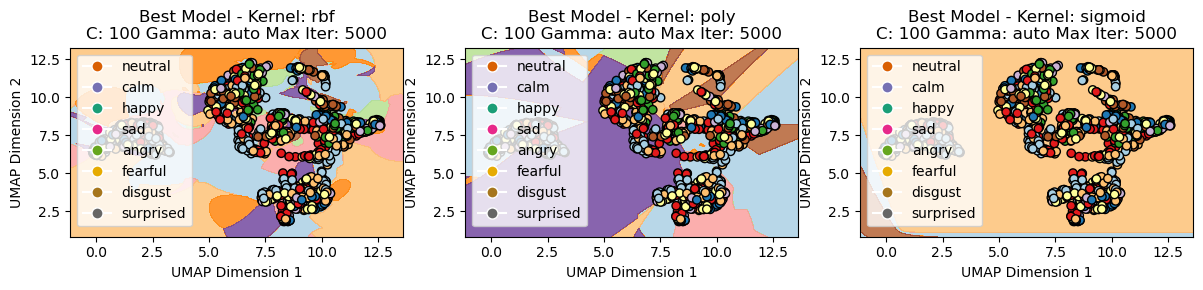

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from umap.umap_ import UMAP

# Apply UMAP to reduce dimensionality
umap = UMAP(n_components=2, random_state=42)
X_train_umap = umap.fit_transform(X_train)

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'max_iter': [1000, 5000, 10000]
}

# Create an SVC object
svc = SVC(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_umap, y_train)

# Get the best parameters and best model for each kernel
best_params = grid_search.best_params_
best_models = []

for kernel in param_grid['kernel']:
    # Set the best parameters for the current kernel
    kernel_params = {key: value for key, value in best_params.items() if key != 'kernel'}
    kernel_params['kernel'] = kernel
    
    # Create a new SVC object with the best parameters for the current kernel
    best_model = SVC(**kernel_params)
    best_model.fit(X_train_umap, y_train)
    best_models.append(best_model)

    print(f"Best model for {kernel} kernel: {best_model}\n")

# Get the best model overall
best_model_overall = grid_search.best_estimator_
print(f"Best model overall: {best_model_overall}\n")

# Generate meshgrid for the plot
resolution = 0.02
x1_min, x1_max = X_train_umap[:, 0].min() - 1, X_train_umap[:, 0].max() + 1
x2_min, x2_max = X_train_umap[:, 1].min() - 1, X_train_umap[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                       np.arange(x2_min, x2_max, resolution))

# Plot the decision boundaries for each best model in 2D
fig, axes = plt.subplots(nrows=1, ncols=len(param_grid['kernel']), figsize=(12, 3))
class_names = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']
colors = ['#d95f02', '#7570b3', '#1b9e77', '#e7298a', '#66a61e', '#e6ab02', '#a6761d', '#666666']

for i, kernel in enumerate(param_grid['kernel']):
    # Set the best parameters for the current kernel
    kernel_params = {key: value for key, value in best_params.items() if key != 'kernel'}
    kernel_params['kernel'] = kernel
    
    # Create a new SVC object with the best parameters for the current kernel
    best_model = SVC(**kernel_params)
    best_model.fit(X_train_umap, y_train)
    
    mesh_predictions = best_model.predict(np.c_[xx1.ravel(), xx2.ravel()])
    mesh_predictions = mesh_predictions.reshape(xx1.shape)
    axes[i].contourf(xx1, xx2, mesh_predictions, cmap=plt.cm.Paired, alpha=0.8)
    axes[i].scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolor='k')
    axes[i].set_xlabel('UMAP Dimension 1')
    axes[i].set_ylabel('UMAP Dimension 2')
    axes[i].set_title(f"Best Model - Kernel: {kernel}\nC: {best_params['C']} "
                      f"Gamma: {best_params['gamma']} Max Iter: {best_params['max_iter']}")
    axes[i].set_xlim(xx1.min(), xx1.max())
    axes[i].set_ylim(xx2.min(), xx2.max())
    axes[i].legend(handles=[plt.Line2D([], [], marker='o', color='w', label=class_names[j], 
                                        markerfacecolor=colors[j], markersize=8) for j in np.unique(y_train)])

plt.tight_layout()
plt.show()


In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from umap.umap_ import UMAP

# Apply UMAP to reduce dimensionality
umap = UMAP(n_components=3, random_state=42)
X_train_umap = umap.fit_transform(X_train)

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'max_iter': [1000, 5000, 10000]
}

# Create an SVC object
svc = SVC(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(svc, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_umap, y_train)

# Get the best parameters and best model for each kernel
best_params = grid_search.best_params_
best_models = []

for kernel in param_grid['kernel']:
    # Set the best parameters for the current kernel
    kernel_params = {key: value for key, value in best_params.items() if key != 'kernel'}
    kernel_params['kernel'] = kernel
    
    # Create a new SVC object with the best parameters for the current kernel
    best_model = SVC(**kernel_params)
    best_model.fit(X_train_umap, y_train)
    best_models.append(best_model)

    print(f"Best model for {kernel} kernel: {best_model}\n")

# Get the best model overall
best_model_overall = grid_search.best_estimator_
print(f"Best model overall: {best_model_overall}\n")

# Generate meshgrid for the plot
resolution = 0.02
x1_min, x1_max = X_train_umap[:, 0].min() - 1, X_train_umap[:, 0].max() + 1
x2_min, x2_max = X_train_umap[:, 1].min() - 1, X_train_umap[:, 1].max() + 1
x3_min, x3_max = X_train_umap[:, 2].min() - 1, X_train_umap[:, 2].max() + 1
xx1, xx2, xx3 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                             np.arange(x2_min, x2_max, resolution),
                             np.arange(x3_min, x3_max, resolution))

# Plot the decision boundaries for each best model in 3D
fig = plt.figure(figsize=(12, 8))
class_names = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']
colors = ['#d95f02', '#7570b3', '#1b9e77', '#e7298a', '#66a61e', '#e6ab02', '#a6761d', '#666666']

for i, kernel in enumerate(param_grid['kernel']):
    # Set the best parameters for the current kernel
    kernel_params = {key: value for key, value in best_params.items() if key != 'kernel'}
    kernel_params['kernel'] = kernel
    
    # Create a new SVC object with the best parameters for the current kernel
    best_model = SVC(**kernel_params)
    best_model.fit(X_train_umap, y_train)
    
    mesh_predictions = best_model.predict(np.c_[xx1.ravel(), xx2.ravel(), xx3.ravel()])
    mesh_predictions = mesh_predictions.reshape(xx1.shape)
    
    ax = fig.add_subplot(1, len(param_grid['kernel']), i + 1, projection='3d')
    ax.voxels(xx1, xx2, xx3, mesh_predictions, cmap=plt.cm.Paired, alpha=0.5)
    ax.scatter(X_train_umap[:, 0], X_train_umap[:, 1], X_train_umap[:, 2], c=y_train, cmap=plt.cm.Paired, edgecolor='k')
    ax.set_xlabel('UMAP Dimension 1')
    ax.set_ylabel('UMAP Dimension 2')
    ax.set_zlabel('UMAP Dimension 3')
    ax.set_title(f"Best Model - Kernel: {kernel}\nC: {best_params['C']} "
                 f"Gamma: {best_params['gamma']} Max Iter: {best_params['max_iter']}")
    ax.legend(handles=[plt.Line2D([], [], marker='o', color='w', label=class_names[j], 
                                   markerfacecolor=colors[j], markersize=8) for j in np.unique(y_train)])

plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1

Best model for rbf kernel: SVC(C=100, gamma='auto', max_iter=5000)



/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best model for poly kernel: SVC(C=100, gamma='auto', kernel='poly', max_iter=5000)

Best model for sigmoid kernel: SVC(C=100, gamma='auto', kernel='sigmoid', max_iter=5000)

Best model overall: SVC(C=100, gamma='auto', max_iter=5000, random_state=42)



/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_29948/110786345.py:53: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_val_pca[:, 0], X_val_pca[:, 1], c=y_val_pred, cmap=plt.cm.Paired, marker='x', s=100, edgecolor='k')
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_29948/110786345.py:53: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_val_pca[:, 0], X_val_pca[:, 1], c=y_val_pred, cmap=plt.cm.Paired, marker='x', s=100, edgecolor='k')
/var/folders/kx/vwf66kn17s153dgnqfn48k180000gn/T/ipykernel_29948/110786345.py:53: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecol

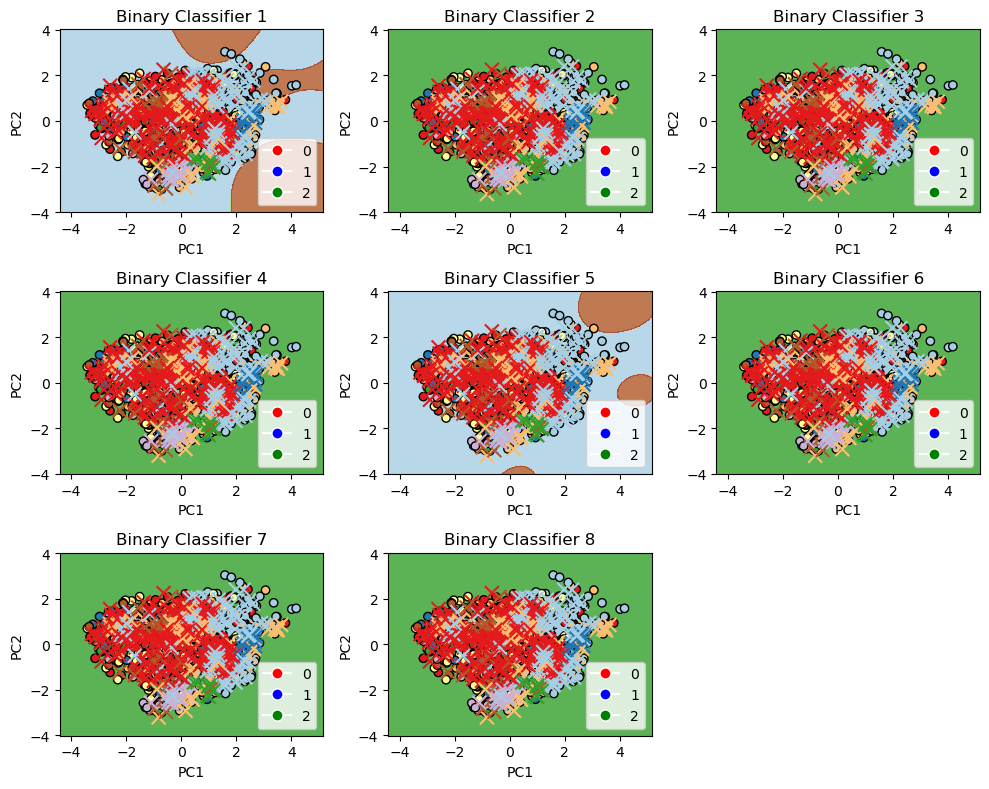

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

# Fit the PCA model to X_train
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Define the parameter distributions for randomized search
param_distributions = {
    'C': np.logspace(-3, 2, 6),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Create an SVM object
svm = SVC()

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(svm, param_distributions, n_iter=10, cv=5, n_jobs=-1)

# Create a OneVsRestClassifier object
ovr = OneVsRestClassifier(random_search)

# Fit the OneVsRestClassifier object to the data
ovr.fit(X_train_pca, y_train)

# Transform X_test using the same PCA object
X_val_pca = pca.transform(X_test)

# Predict the labels for X_test using the OneVsRestClassifier object
y_val_pred = ovr.predict(X_val_pca)

# Plot the decision boundaries in 2D for each binary classifier
resolution = 0.02
x1_min, x1_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
x2_min, x2_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                       np.arange(x2_min, x2_max, resolution))

plt.figure(figsize=(10, 8))

for i, clf in enumerate(ovr.estimators_):
    mesh_predictions = clf.predict(np.c_[xx1.ravel(), xx2.ravel()])
    mesh_predictions = mesh_predictions.reshape(xx1.shape)
    
    plt.subplot(3, 3, i + 1)
    plt.contourf(xx1, xx2, mesh_predictions, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolor='k')
    plt.scatter(X_val_pca[:, 0], X_val_pca[:, 1], c=y_val_pred, cmap=plt.cm.Paired, marker='x', s=100, edgecolor='k')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.title(f"Binary Classifier {i + 1}")
    plt.legend(handles=[plt.Line2D([], [], marker='o', color='w', label=label, 
                                markerfacecolor=color, markersize=8) 
                     for label, color in zip(np.unique(y_train), ['red', 'blue', 'green'])])

plt.tight_layout()
plt.show()


In [35]:
# X_train = df_train[attributes]
# y_train = df_train[emotion_cols]

In [36]:
# y_train.shape

(1828, 8)

In [34]:
# X_train = df_train[attributes]
# y_train = df_train[emotion_cols]
# # Convert y_train X_test             one-hot encoding to class labels
# y_train = np.argmax(y_train, axis=1)

# # Print the shape of y_train
# print(y_train.shape)

# # X_test = df_test[attributes]
# # y_test = df_test[target_name]

ValueError: Shape of passed values is (1828, 1), indices imply (1828, 8)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxS

ValueError: The number of classes has to be greater than one; got 1 class

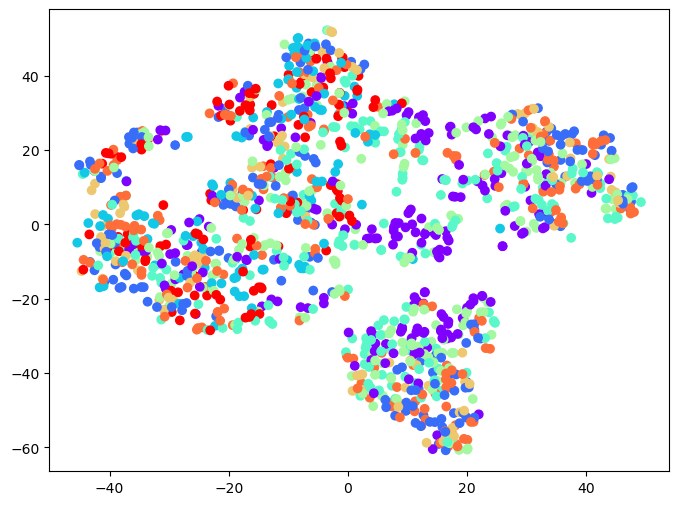

In [52]:
import numpy as np
import matplotlib.pyplot as plt
X_test             sklearn.decomposition import PCA
X_test             sklearn.manifold import TSNE
X_test             sklearn.model_selection import GridSearchCV
X_test             sklearn.svm import SVC

# Apply dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'max_iter': [1000, 5000, 10000]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_tsne, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Generate meshgrid for the plot
resolution = 0.02
x1_min, x1_max = X_train_tsne[:, 0].min() - 1, X_train_tsne[:, 0].max() + 1
x2_min, x2_max = X_train_tsne[:, 1].min() - 1, X_train_tsne[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                       np.arange(x2_min, x2_max, resolution))

# Plot the scatter plot of the reduced-dimensional data with class labels
plt.figure(figsize=(8, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='rainbow')

# Plot the decision boundaries and margins
for i, class_name in enumerate(np.unique(y_train)):
    class_mask = (y_train == class_name)
    X_class = X_train_tsne[class_mask]
    y_class = y_train[class_mask]

    # Create a new SVC object with the best parameters for the current class
    best_model_class = SVC(**best_params)
    best_model_class.fit(X_class, y_class)
    
    mesh_predictions = best_model_class.predict(np.c_[xx1.ravel(), xx2.ravel()])
    mesh_predictions = mesh_predictions.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, mesh_predictions, alpha=0.3, cmap='rainbow')
    plt.scatter(X_class[:, 0], X_class[:, 1], c=y_class, cmap='rainbow', edgecolor='k', label=class_name)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Decision Boundaries and Margins')
plt.legend()
plt.colorbar()
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxS

ValueError: The number of classes has to be greater than one; got 1 class

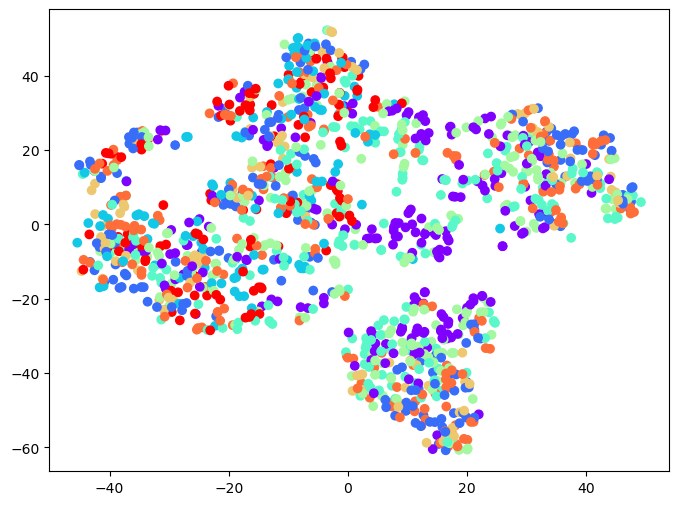

In [56]:
import numpy as np
import matplotlib.pyplot as plt
X_test             sklearn.decomposition import PCA
X_test             sklearn.manifold import TSNE
X_test             sklearn.model_selection import GridSearchCV
X_test             sklearn.svm import SVC

# Apply dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'max_iter': [1000, 5000, 10000]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_tsne, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Generate meshgrid for the plot
resolution = 0.02
x1_min, x1_max = X_train_tsne[:, 0].min() - 1, X_train_tsne[:, 0].max() + 1
x2_min, x2_max = X_train_tsne[:, 1].min() - 1, X_train_tsne[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                       np.arange(x2_min, x2_max, resolution))

# Plot the scatter plot of the reduced-dimensional data with class labels
plt.figure(figsize=(8, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='rainbow')

# Plot the decision boundaries and margins
for i, class_name in enumerate(np.unique(y_train)):
    class_mask = (y_train == class_name)
    X_class = X_train_tsne[class_mask]
    y_class = y_train[class_mask]

    # Create a new SVC object with the best parameters for the current class
    best_model_class = SVC(**best_params)
    best_model_class.fit(X_class, y_class)
    
    mesh_predictions = best_model_class.predict(np.c_[xx1.ravel(), xx2.ravel()])
    mesh_predictions = mesh_predictions.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, mesh_predictions, alpha=0.3, cmap='rainbow')
    plt.scatter(X_class[:, 0], X_class[:, 1], c=y_class, cmap='rainbow', edgecolor='k', label=class_name)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Decision Boundaries and Margins')
plt.legend()
plt.colorbar()
plt.show()


In [57]:
unique_classes = np.unique(y_train)
print(unique_classes)


[0 1 2 3 4 5 6 7]


In [59]:
print(X_train_tsne.shape)
print(y_train.shape)


(1371, 2)
(1371,)


/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxS

ValueError: The number of classes has to be greater than one; got 1 class

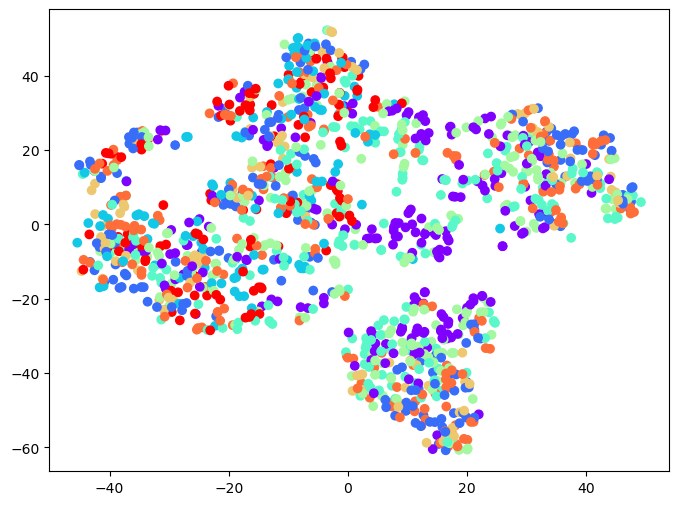

In [61]:
import numpy as np
import matplotlib.pyplot as plt
X_test             sklearn.decomposition import PCA
X_test             sklearn.manifold import TSNE
X_test             sklearn.model_selection import GridSearchCV, StratifiedKFold
X_test             sklearn.svm import SVC

# Apply dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'max_iter': [1000, 5000, 10000]
}

# Create a StratifiedKFold object
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a GridSearchCV object with StratifiedKFold
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=cv, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_tsne, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Generate meshgrid for the plot
resolution = 0.02
x1_min, x1_max = X_train_tsne[:, 0].min() - 1, X_train_tsne[:, 0].max() + 1
x2_min, x2_max = X_train_tsne[:, 1].min() - 1, X_train_tsne[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                       np.arange(x2_min, x2_max, resolution))

# Plot the scatter plot of the reduced-dimensional data with class labels
plt.figure(figsize=(8, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='rainbow')

# Plot the decision boundaries and margins
for i, class_name in enumerate(np.unique(y_train)):
    class_mask = (y_train == class_name)
    X_class = X_train_tsne[class_mask]
    y_class = y_train[class_mask]

    # Create a new SVC object with the best parameters for the current class
    best_model_class = SVC(**best_params)
    best_model_class.fit(X_class, y_class)
    
    mesh_predictions = best_model_class.predict(np.c_[xx1.ravel(), xx2.ravel()])
    mesh_predictions = mesh_predictions.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, mesh_predictions, alpha=0.3, cmap='rainbow')
    plt.scatter(X_class[:, 0], X_class[:, 1], c=y_class, cmap='rainbow', edgecolor='k', label=class_name)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Decision Boundaries and Margins')
plt.legend()
plt.colorbar()
plt.show()


In [ ]:
def multi_class_ROC_emotion(y_true_bin, y_pred_probs):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(8):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves
    plt.figure(figsize=(8, 6))
    colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange']
    for i, color in zip(range(8), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2, label='ROC Curve %s (area = %0.2f)' % (ENCODED_EMOTIONS[i], roc_auc[i]))

    # Set plot properties
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves - Multinomial Logistic Classifier')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()